Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

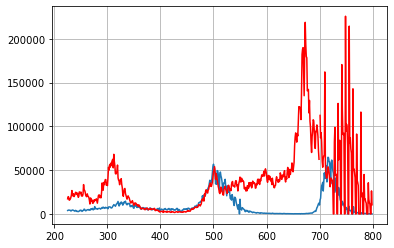

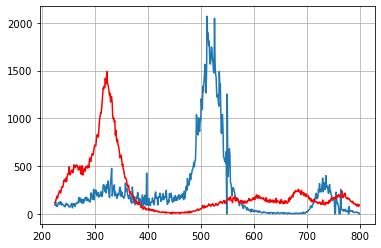

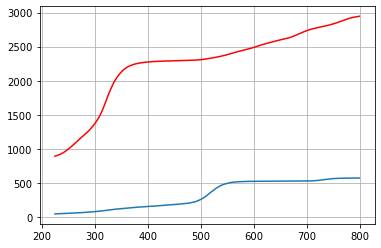

In [1]:
#Read data csv from:
#https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading data from file
df = pd.read_csv('covid.csv')

#Screening columns, data head and certain data location
print(df.columns)
#print(df.head())
#print(df.loc[30000,:])

#Selecting certain country in data columns
df1 = df.loc[df['location'] == 'Indonesia']
#df1=df1[['location','date','new_cases','new_deaths','new_vaccinations','stringency_index','new_cases_smoothed','new_deaths_smoothed']]
#print(df1.tail())
df2 = df.loc[df['location'] == 'United Kingdom']
#df2=df2[['location','date','new_cases','new_deaths','new_vaccinations','stringency_index','new_cases_smoothed','new_deaths_smoothed']]
#print(df2.loc[df2['date'] == '2021-03-15'])
#print(df2.tail())

#Reseting data index
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
#print(df1.tail())

#Trimming data to the same length
#print(df2)
#print(len(df2) - len(df1))
df2=df2.iloc[len(df2) - len(df1):]
df2.reset_index(drop=True, inplace=True)
#print(df2.tail())

#Setting the last XX days data, 720 = 24 months
df1=df1.iloc[len(df1)-720:800]
df2=df2.iloc[len(df2)-720:800]
#print(df1)
#print(df2)

plt.plot(df1['new_cases'])
plt.plot(df2['new_cases'],'r')
plt.grid()
plt.show()
plt.plot(df1['new_deaths'])
plt.plot(df2['new_deaths'],'r')
plt.grid()
plt.show()
plt.plot(df1['total_deaths_per_million'])
plt.plot(df2['total_deaths_per_million'],'r')
plt.grid()

(239, 5)
                 location  total_cases_per_million  total_deaths_per_million  \
797           Afghanistan                 4461.382                   191.599   
1760               Africa                 8386.973                   181.616   
2711              Albania                96390.527                  1224.643   
3662              Algeria                 6016.166                   155.621   
4607              Andorra               523179.897                  1935.876   
5534               Angola                 2877.569                    55.066   
6453             Anguilla               176982.162                   571.320   
7387  Antigua and Barbuda                81806.479                  1458.914   
8393            Argentina               200625.420                  2841.479   
9366              Armenia               151513.773                  3089.244   

      total_vaccinations_per_hundred  total_tests_per_thousand  
797                              NaN         

[Text(0.5, 0.92, 'COVID19'),
 Text(0.5, 0, 'total_cases_per_million'),
 Text(0.5, 0.5, 'total_deaths_per_million'),
 Text(0.5, 0, 'total_vaccinations_per_hundred')]

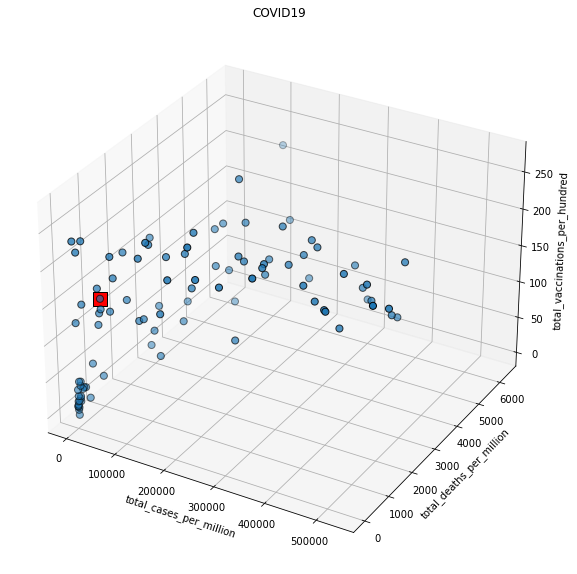

In [2]:
#Picking data from a certain date
df3=df.loc[df['date'] == '2022-05-01']

#Selecting certain parameters for clustering
df3=df3[['location','total_cases_per_million', 'total_deaths_per_million', 'total_vaccinations_per_hundred','total_tests_per_thousand']]
print(df3.shape)
print(df3.head(10))

#Selecting data from Indonesia for plotting
df4=df3.loc[df['location'] == 'Indonesia']
print(df4)

#Sorting values by certain parameters
df3=df3.sort_values(by=['total_deaths_per_million'], ascending=False)

#deleting the first XX rows of data
#df3=df3[9:]
print(df3.head(30))

#plt.scatter(df3['new_cases'], df3['new_deaths'], marker="o", s=50, edgecolor="k", projection="3d")
#plt.grid()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df3['total_cases_per_million'], df3['total_deaths_per_million'], df3['total_vaccinations_per_hundred'], s=50, edgecolor="k")
ax.scatter(df4['total_cases_per_million'], df4['total_deaths_per_million'], df4['total_vaccinations_per_hundred'], c='r', marker="s", s=200, edgecolor="k")
plt.gca().update(dict(title='COVID19', xlabel='total_cases_per_million', ylabel='total_deaths_per_million',zlabel='total_vaccinations_per_hundred'))

In [3]:
#Selecting certain parameters for prediction
df4=df3[['total_cases_per_million','total_deaths_per_million']]
print(df4.shape)
print(df4.head())

df4=df4.dropna()
df4.reset_index(drop=True, inplace=True)
print(df4.shape)
print(df4.head())

(239, 2)
        total_cases_per_million  total_deaths_per_million
157721               105762.690                  6312.858
31014                168021.083                  5361.416
26351                115283.880                  4819.711
89577                195783.615                  4758.189
74022                440441.407                  4473.148
(221, 2)
   total_cases_per_million  total_deaths_per_million
0               105762.690                  6312.858
1               168021.083                  5361.416
2               115283.880                  4819.711
3               195783.615                  4758.189
4               440441.407                  4473.148


0.24700865477051281
[[0.00405386]]
[580.73317017]


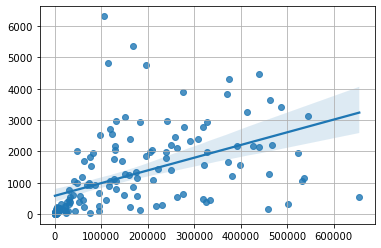

73


0.2485834903744909

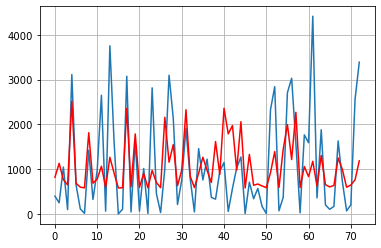

In [8]:
from sklearn.model_selection import train_test_split

x=df4[['total_cases_per_million']].values
y=df4[['total_deaths_per_million']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=True)

#print(x[0:5])
#print(y[0:5])
#print(y_test[0:5])

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.coef_)
print(reg.intercept_)

y_pred=reg.predict(x_test)

#Plotting Total Deaths vs Total Cases and the regression line
import seaborn as sns
#create scatterplot with regression line
sns.regplot(x=x_train, y=y_train)
plt.grid()

#Plotting y_prediction & y_test
plt.show()
plt.plot(y_test)
plt.plot(y_pred,'r')
plt.grid()
print(len(y_pred))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [9]:
#Selecting certain parameters for prediction
df5=df3[['total_vaccinations_per_hundred','total_deaths_per_million']]
print(df5.shape)
print(df5.head())

df5=df5.dropna()
df5.reset_index(drop=True, inplace=True)
print(df5.shape)
print(df5.head())

(239, 2)
        total_vaccinations_per_hundred  total_deaths_per_million
157721                          216.25                  6312.858
31014                              NaN                  5361.416
26351                              NaN                  4819.711
89577                           170.16                  4758.189
74022                              NaN                  4473.148
(97, 2)
   total_vaccinations_per_hundred  total_deaths_per_million
0                          216.25                  6312.858
1                          170.16                  4758.189
2                          107.02                  4324.219
3                          129.15                  3900.117
4                          167.27                  3821.231


0.1411843031702935
[[6.34325472]]
[400.17767998]


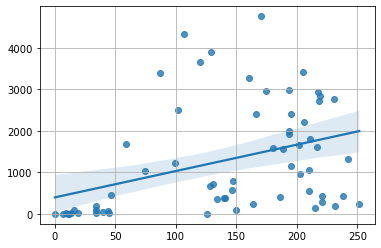

33


0.1310670828290268

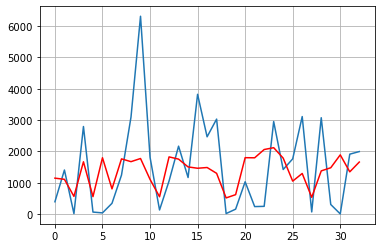

In [10]:
from sklearn.model_selection import train_test_split

x=df5[['total_vaccinations_per_hundred']].values
y=df5[['total_deaths_per_million']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=True)

#print(x[0:5])
#print(y[0:5])
#print(y_test[0:5])

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.coef_)
print(reg.intercept_)

y_pred=reg.predict(x_test)

#Plotting Total Deaths vs Total Cases and the regression line
import seaborn as sns
#create scatterplot with regression line
sns.regplot(x=x_train, y=y_train)
plt.grid()

#Plotting y_prediction & y_test
plt.show()
plt.plot(y_test)
plt.plot(y_pred,'r')
plt.grid()
print(len(y_pred))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [11]:
#Selecting certain parameters for prediction
df3=df3[['total_vaccinations_per_hundred','total_cases_per_million','total_deaths_per_million']]
print(df3.shape)
print(df3.head())

df3=df3.dropna()
df3.reset_index(drop=True, inplace=True)
print(df3.shape)
print(df3.head())

(239, 3)
        total_vaccinations_per_hundred  total_cases_per_million  \
157721                          216.25               105762.690   
31014                              NaN               168021.083   
26351                              NaN               115283.880   
89577                           170.16               195783.615   
74022                              NaN               440441.407   

        total_deaths_per_million  
157721                  6312.858  
31014                   5361.416  
26351                   4819.711  
89577                   4758.189  
74022                   4473.148  
(97, 3)
   total_vaccinations_per_hundred  total_cases_per_million  \
0                          216.25               105762.690   
1                          170.16               195783.615   
2                          107.02               374752.930   
3                          129.15               276587.355   
4                          167.27               371628.856  

0.43206306906790504
[[-0.41186477  0.00555252]]
[450.29082737]
33


0.23356292316458527

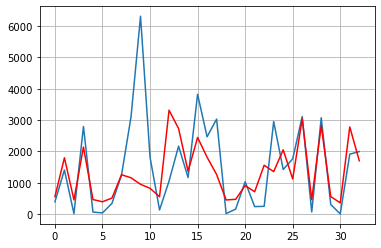

In [12]:
from sklearn.model_selection import train_test_split

x=df3[['total_vaccinations_per_hundred','total_cases_per_million']].values
y=df3[['total_deaths_per_million']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=True)

#print(x[0:5])
#print(y[0:5])
#print(y_test[0:5])

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.coef_)
print(reg.intercept_)

y_pred=reg.predict(x_test)

plt.plot(y_test)
plt.plot(y_pred,'r')
plt.grid()
print(len(y_pred))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)